In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style='darkgrid')

<AxesSubplot:>

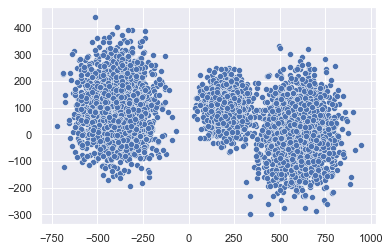

In [2]:
data = np.load("data/data.npy")
sns.scatterplot(x=data[:, 0], y=data[:, 1])

In [3]:
def euclidian_distance(a, b):
    return np.sqrt(sum(a - b) **2)

def init_centroid(centroids, data, distance=euclidian_distance):
    distances = [min([distance(point, x) for point in centroids]) for x in data]
    # normalize distances so that their sum is 1 -> probability law
    probabilities = distances / sum(distances)
    # chose new centroid according to the probability distribution defined above
    new_centroid = np.random.choice(len(probabilities), p=probabilities)
    return data[new_centroid]

In [4]:
CENTROID_NB = 3

def init_centroids(cluster_nb):
    centroid0 = data[np.random.randint(len(data))]
    centroids = np.array([centroid0])
    for i in range(cluster_nb - 1):
        centroids = np.append(centroids, [init_centroid(centroids[-1], data)], axis=0)
    return centroids

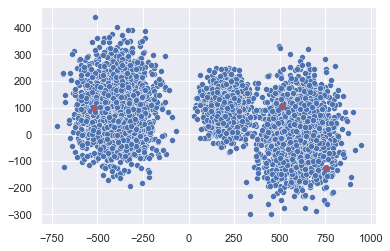

In [5]:
centroids = init_centroids(CENTROID_NB)
sns.scatterplot(x=data[:, 0], y=data[:, 1])
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], color='r', edgecolors='b')

In [6]:
def assign_points(data, centroids, distance=euclidian_distance):
    cluster_assignations = []
    for x, i in enumerate(data):
        distances = [distance(x, point) for point in centroids]
        cluster_assignations[i] = np.argmin(distances)
    return cluster_assignations

In [7]:
def update_clusters(data, centroids, cluster_assignations):
    for i in range(len(centroids)):
        cluster_data = np.where(cluster_assignations == centroids[i], data)
        centroids[i] = np.mean(cluster_data)
    return centroids

In [8]:
def show_clusters(data, cluster_assignations):
    data_show = np.append(data, cluster_assignations, axis=0)
    sns.scatterplot(x=data_show[:, 0], y=data_show[:, 1], color=data_show[:, 2])

In [9]:
def k_means_iteration(data, centroids):
    cluster_assignations = assign_points(data, centroids)
    update_clusters(data, centroids, cluster_assignations)
    show_clusters(data, cluster_assignations)

In [10]:
def k_means(data, nb_clusters, iterations=20):
    centroids = init_centroids(nb_clusters)

    for i in range(iterations):
        k_means_iteration(data, centroids)
        #inertia = compute_inertia(data, centroids, cluster_assignations)

In [13]:
print(CENTROID_NB)

3


In [ ]:
k_means(data, CENTROID_NB)

In [1]:
def calculate_dist(d1, d2):
    
    age_dist  = abs(float(d1["age"]) - float(d2["age"])) * 0.8
    hypertension_dist = abs(float(d1["hypertension"]) - float(d2["hypertension"])) * 0.8
    heart_disease_dist = abs(float(d1["heart_disease"]) - float(d2["heart_disease"])) * 0.8
    smoking_status = abs(float(d1["smoking_status"]) - float(d2["smoking_status"])) * 0.8
    avg_glucose_level_dist = abs(float(d1["avg_glucose_level"]) - float(d2["avg_glucose_level"])) * 0.5
    bmi_dist = abs(float(d1["bmi"]) - float(d2["bmi"])) * 0.5
    residence_type_dist = abs(float(d1["Residence_type"]) - float(d2["Residence_type"])) * 0.2
    distance = age_dist + hypertension_dist + heart_disease_dist + residence_type_dist + avg_glucose_level_dist + bmi_dist + smoking_status_dist
    
    return distance

In [18]:
data = pd.read_csv("data/data.csv")
distance = []

for i,d in data.iterrows():
    distance.append(calculate_dist(d))

In [ ]:
k_means(np.asarray(distance), CENTROID_NB)